Нестеров Владислав, 569МН група, Варіант 8

Частота f[МГц] = 560
Число елементів антени N = 9

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
from scipy.constants import c as light_speed

In [7]:
FC = [1] # ДС антени в площині Н
FE = [1] # ДС антени в площині Е
F1E = [1] # ДС напівхвильового вібратора в площині Е

steps = [0] # кути θ
SGP1 = 0 # Ширина головної пелюстки в площині FH
SGP2 = 0 # Ширина головної пелюстки в площині FE

Zeros = [] # нульові кути

In [8]:
N = 9 # Кількість елементів антени
F = 560e6 # Частота переведена в Гц

wavelength = round(light_speed / F, 4)
dcp = round(0.25 * wavelength, 4) 
k = round((2 * np.pi) / wavelength, 4) 

print(f"λ = {wavelength} m")
print(f"dcp = {dcp} m")
print(f"k = {k} rad/m")

λ = 0.5353 m
dcp = 0.1338 m
k = 11.7377 rad/m


In [9]:
# Обчислюємо кути θ векторизовано, попередньо обмеживши значення в межах [-1, 1]
m_values = np.arange(1, 11)
argument = np.clip(1 - (m_values * wavelength) / (N * dcp), -1, 1)

# Обчислюємо кути θ з обмеженими значеннями
p_values = np.arccos(argument)

# Округлюємо кути
theta_min = np.round(np.degrees(p_values[p_values <= np.pi / 2]), 2)

# Виводимо мінімальні кути θ
for idx, theta in enumerate(theta_min):
    print(f"θ{idx + 1} min = {theta}\u00b0")

θ1 min = 56.26°
θ2 min = 83.63°


In [10]:
# Ініціалізація масиву theta
theta = np.arange(0.01, np.pi / 2, 0.01)

# Обчислення значень ДС
mn1 = np.abs(np.cos(np.pi / 2 * np.sin(theta)) / np.cos(theta))
mn2 = np.abs(np.sin(N * k * dcp * (1 - np.cos(theta)) / 2) / 
             (N * np.sin(k * dcp * (1 - np.cos(theta)) / 2)))
mn3 = mn1 * mn2

# Додаємо обчислені значення в списки
F1E.extend(mn1)
FC.extend(mn2)
FE.extend(mn3)

# Інтерполюємо значення mn2 та mn3 для пошуку точних кутів
interp_mn2 = interp1d(mn2, theta, kind='linear', bounds_error=False, fill_value='extrapolate')
interp_mn3 = interp1d(mn3, theta, kind='linear', bounds_error=False, fill_value='extrapolate')

# Шукаємо точні кути, де mn2 та mn3 перетинають 0.707, конвертуємо у градуси та обчислюємо ширину пелюсток
SGP1 = np.round(2 * np.degrees(interp_mn2(0.707)), 2)
SGP2 = np.round(2 * np.degrees(interp_mn3(0.707)), 2)

# Визначення нульових кутів і додавання кутів у список steps
Zeros = np.round(np.degrees(theta[mn2 < 0.01]), 2)
steps.extend(np.degrees(theta))

In [11]:
peaks_fc, _ = find_peaks(FC)  # Знайдемо індекси максимумів для FC
theta_max_fc = np.degrees(theta[peaks_fc])  # Перетворюємо на градуси
FC_peaks = np.array(FC)[peaks_fc]  # Значення максимумів для FC

# Виводимо значення максимумів
for idxE, (thetaH, valueH) in enumerate(zip(theta_max_fc, FC_peaks)):
    print(f"θ_maxH {idxE + 1} = {thetaH:.2f}\u00b0; значення = {valueH:.3f}")

θ_maxH 1 = 69.33°; значення = 0.227


In [12]:
peaks_fe, _ = find_peaks(FE)  # Знайдемо індекси максимумів для FE
theta_max_fe = np.degrees(theta[peaks_fe])  # Перетворюємо на градуси
FE_peaks = np.array(FE)[peaks_fe]  # Значення максимумів для FE

# Виводимо значення максимумів
for idxE, (thetaE, valueE) in enumerate(zip(theta_max_fe, FE_peaks)):
    print(f"θ_maxE {idxE + 1} = {thetaE:.2f}\u00b0; значення = {valueE:.3f}")

θ_maxE 1 = 66.46°; значення = 0.071
θ_maxE 2 = 87.09°; значення = 0.003


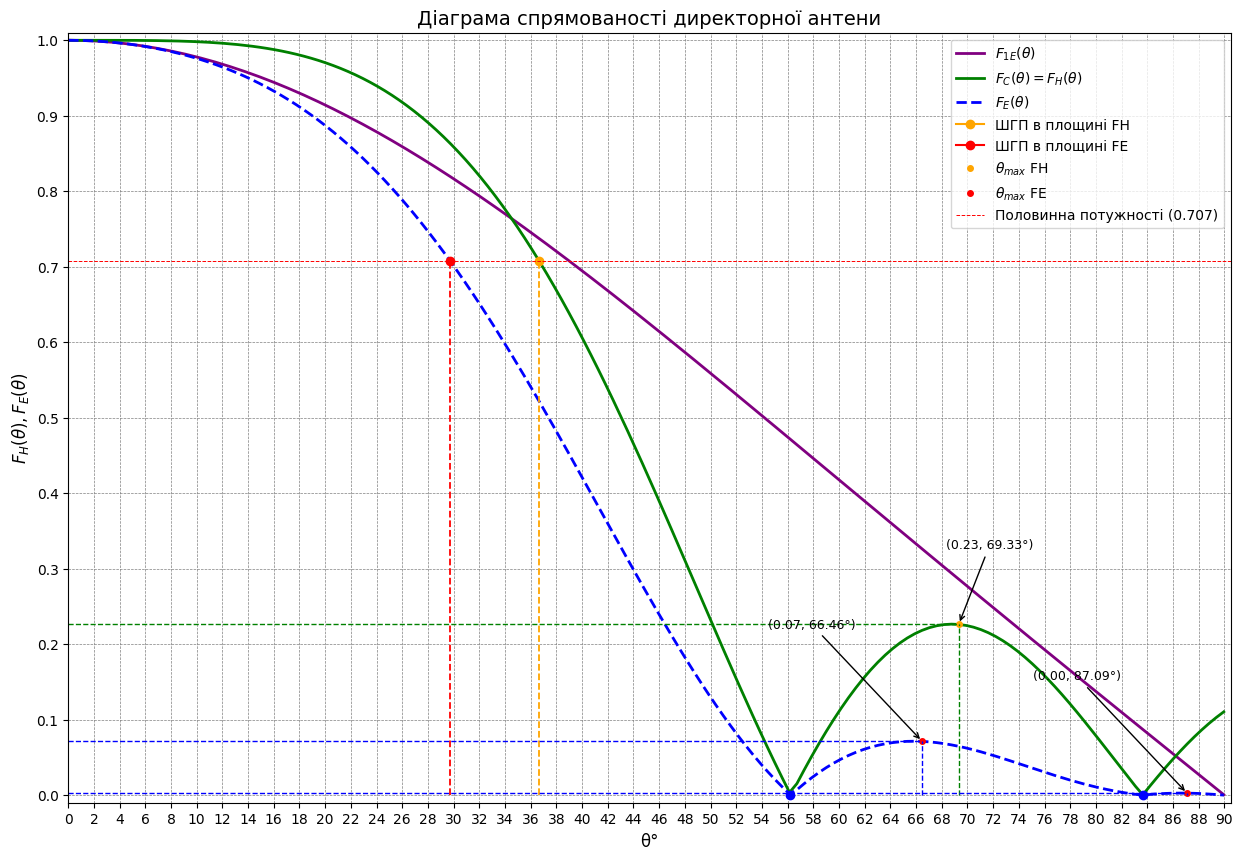

In [13]:
plt.figure(figsize = (15, 10))

# Побудова графіків ДС
plt.plot(steps, F1E, label="$ F_{1E}(θ) $", linestyle="solid", color="purple", linewidth=2)
plt.plot(steps, FC, label="$ F_{C}(θ) = F_{H}(θ) $", linestyle="solid", color="green", linewidth=2)
plt.plot(steps, FE, label="$ F_{E}(θ) $", linestyle="dashed", color="blue", linewidth=2)

# Позначаємо знайдені точки
plt.plot(SGP1 / 2, 0.707, marker="o", color='orange', markersize=6, label="ШГП в площині FH")
plt.plot(SGP2 / 2, 0.707, marker="o", color='red', markersize=6, label="ШГП в площині FE")

# Позначаємо нулі
plt.plot(Zeros, [0] * len(Zeros), 'bo')  

# Наносимо максимуми на графік
plt.plot(theta_max_fc, FC_peaks, "o", color = "orange", markersize=4, label="$ \\theta_{max} $ FH")
plt.plot(theta_max_fe, FE_peaks, "ro", markersize=4, label="$ \\theta_{max} $ FE")

# Додаємо вертикальні лінії для точок ШГП
plt.vlines(x=SGP1 / 2, ymin=0, ymax=0.707, colors='orange', linestyles='dashed', linewidth=1.3)
plt.vlines(x=SGP2 / 2, ymin=0, ymax=0.707, colors='red', linestyles='dashed', linewidth=1.3)

# Додаємо вертикальні лінії для точок theta_max_fc
for i in range(len(theta_max_fc)):
    plt.vlines(x=theta_max_fc[i], ymin=0, ymax=FC_peaks[i], colors='green', linestyles='dashed', linewidth=1)
    plt.hlines(y=FC_peaks[i], xmin=0, xmax=theta_max_fc[i], colors='green', linestyles='dashed', linewidth=1)

    # Додаємо анотації
    plt.annotate(f'({FC_peaks[i]:.2f}, {theta_max_fc[i]:.2f}\u00b0)', 
                 xy=(theta_max_fc[i], FC_peaks[i]), 
                 xytext=(theta_max_fc[i]-1, FC_peaks[i]+0.1), 
                 arrowprops=dict(arrowstyle='->', color='black'), fontsize=9)
    
# Додаємо вертикальні лінії для точок theta_max_fe
for i in range(len(theta_max_fe)):
    plt.vlines(x=theta_max_fe[i], ymin=0, ymax=FE_peaks[i], colors='blue', linestyles='dashed', linewidth=1)
    plt.hlines(y=FE_peaks[i], xmin=0, xmax=theta_max_fe[i], colors='blue', linestyles='dashed', linewidth=1)

    # Додаємо анотації
    plt.annotate(f'({FE_peaks[i]:.2f}, {theta_max_fe[i]:.2f}\u00b0)', 
                 xy=(theta_max_fe[i], FE_peaks[i]), 
                 xytext=(theta_max_fe[i]-12, FE_peaks[i]+0.15), 
                 arrowprops=dict(arrowstyle='->', color='black'), fontsize=9)

# Позначаємо рівень половинної потужності (0.707)
plt.axhline(y=0.707, color="r", linestyle="dashed", label="Половинна потужності (0.707)", linewidth=0.7)

plt.xlabel("θ" + '\u00b0', fontsize=12)
plt.ylabel("$ F_H(θ), F_E(θ) $", fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.grid(which='both', linestyle='--', linewidth=0.5, color='gray') 
plt.title("Діаграма спрямованості директорної антени", fontsize=14) 

# Задаємо розміри клітинок
plt.xticks(np.arange(0, 100, 2), fontsize=10)
plt.yticks(np.arange(0, 1.2, 0.1), fontsize=10)

# Задаємо ліміти відображення
plt.ylim(-0.01, 1.01) 
plt.xlim(0, 90.5) 

plt.show()